# <center> R2.08 - Statistique descriptive <br> Régression linéaire et données MySQL </center>

<center> A. Ridard </center>

L'objectif est d'illustrer la section 3 du cours 2 avec Python, mais aussi l'importation de données à partir d'une base MySQL.

In [53]:
# importation des packages
import numpy as np
import pandas as pd

# importation des modules
import matplotlib.pyplot as plt
import scipy.stats as sps
import mysql.connector

import warnings
warnings.filterwarnings('ignore')

> Charger dans un DataFrame le résultat de la requête fournissant pour chaque quartier (désigné par son identifiant), la longueur des pistes cyclables et le nombre de compteurs.

> *Remarque : j'ai ajouté deux contraintes pour retirer deux points "aberrants"*

In [55]:
# on commence par créer une connexion à la base de données

### cela suppose évidemment d'avoir créé au préalable la bd et l'utilisateur, mais aussi d'avoir créé et rempli les tables
### normalement, ceci a été fait pour le TP8 de R2.06

cnx = mysql.connector.connect(user='nantes', password='mdp_nantes', host='127.0.0.1', database='bd_nantes')

# on peut alors afficher toutes les tables de la base de données

mycursor = cnx.cursor() 
mycursor.execute("SHOW TABLES")
myresult = mycursor.fetchall() 
  
for x in myresult: 
    print(x)  

# on peut aussi charger le résultat d'une requête dans un DataFrame

### l'utilisation de """ """ permet de présenter la requête SQL sur plusieurs lignes comme d'habitude
ma_requete = """
SELECT idQuartier, COUNT(idCompteur) x, ROUND(longueurPisteVelo/1000) y
FROM Quartier
JOIN Compteur ON idQuartier = leQuartier
GROUP BY idQuartier, longueurPisteVelo
HAVING ROUND(longueurPisteVelo/1000) < 40
AND COUNT(idCompteur) < 20
ORDER BY x
"""
            
df = pd.read_sql_query(ma_requete, cnx)

# /!\ on n'oublie pas de fermer la connexion à la base
cnx.close()

# on affiche le DataFrame
df

('comptage',)
('compteur',)
('dateinfo',)
('quartier',)


idQuartier  x     y
0           3  1   4.0
1           8  2  23.0
2          11  2  16.0
3       14304  2   8.0
4       14307  2  13.0
5           4  4  31.0
6           6  6  32.0
7           5  9  28.0

> - Représenter le nuage de points entre la longueur des pistes (en km) et le nombre de compteurs ainsi que la droite d'ajustement
> - Enregistrer la représentation graphique obtenue au format .png
> - Indiquer le coefficient de détermination

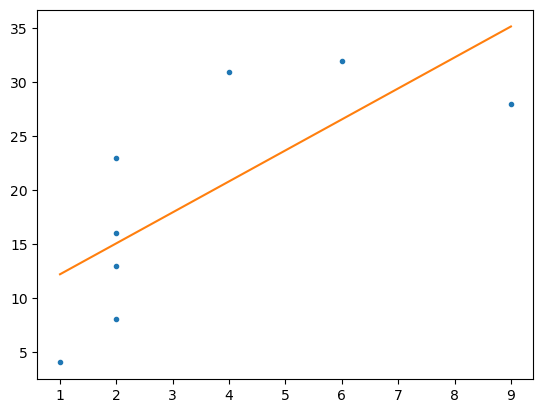

Coefficient de détermination : 0.5373495858727926


In [56]:
# on représente le nuage de points
abs = df["x"]
ord = df["y"]
plt.plot(abs, ord, '.')

# on "calcule" la régression linéaire et on représente la droite d'ajustement
a, b, r, _, _ = sps.linregress(abs, ord)
x = np.linspace(abs.min(), abs.max(), 100)
plt.plot(x, a*x+b)

# on enregistre la figure (dans le répertoire du notebook)
plt.savefig("image")

# on affiche la figure
plt.show()

# on affiche le coefficient de détermination
print("Coefficient de détermination :", r**2)

# comme on pouvait déjà le voir avec le nuage de points, ce modèle n'est effectivement pas pertinent ! 